In [365]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import numpy as np
import random
import pandas as pd

In [366]:
class MoneyModel(Model):
    
    """A model with some number of agents."""
   
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        
        # Create agents  
        
        for i in range(self.num_agents):          
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        ag_sch = self.schedule.step()
        #print(ag_sch)

In [367]:
class MoneyAgent(Agent):
    
    """ An agent with fixed initial wealth."""    

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
        for w in [random.randrange (100,1001)]:
            self.wealth = w
        
        for c in [random.randint (5,100)]:
            self.cost = c 

    def step(self):
    
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += self.cost
        self.wealth -= self.cost

#This step indicates the minimum wealth an agent must have in order to participate
        if other_agent.wealth <= 100:
           self.wealth += 200


        agent_N = ["Investor 1 ","Investor 2 ","Consumer 1 ","Consumer 2 ","Consumer 3 ","Prosumer 1 ","Prosumer 2 ","Prosumer 3 ","Retailer   ","Distributor"]
        #This is done to organize the step wealth of agents
        tempAgent_W.append([self.unique_id, self.wealth])

        #print ("Hi, I am " + agent_N[self.unique_id] + " and my wealth is " + str(self.wealth))
        print (f"Hi, I am {agent_N[self.unique_id]} and my wealth is {str(self.wealth)}")

        #Command to show the results
        return agent_N[self.unique_id], self.wealth

In [375]:
#Big collaboration from Godwin
Agents=4
tempAgent_W=[]
Result=[]
df_=pd.DataFrame(data=Result, columns=[str(i) for i in range(Agents)])
agent_N = ["Investor 1 ","Investor 2 ","Consumer 1 ","Consumer 2 ","Consumer 3 ","Prosumer 1 ","Prosumer 2 ","Prosumer 3 ","Retailer   ","Distributor"]
def _arangeData(tempAgent_W):
    global df_
    wealthList=[]
    tempAgent_W.sort(key=lambda x: x[0], reverse=False)
    for j in range(Agents):        
        wealthList.append(tempAgent_W[j][1])
    new_row = {str(n):wealthList[n] for n in range(len(wealthList))}
    df_ = df_.append(new_row, ignore_index=True)
    return

In [376]:
empty_model = MoneyModel(Agents)
empty_model.step()

Hi, I am Consumer 1  and my wealth is 51
Hi, I am Investor 2  and my wealth is 638
Hi, I am Consumer 2  and my wealth is 703
Hi, I am Investor 1  and my wealth is 597


In [377]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()
print(df_)

Empty DataFrame
Columns: [0, 1, 2, 3]
Index: []


In [378]:
#Godwin helps to customize the number of steps into a variable

model = MoneyModel(Agents)
sim_Step=10
for i in range(sim_Step):
    #print("Wealth for step "+str(i))
    print (f'wealth for step {str(i)}')
    model.step()
    _arangeData(tempAgent_W)
    tempAgent_W=[]

    
#agent_wealth = [a.wealth for a in model.schedule.agents]
#plt.hist(agent_wealth)

wealth for step 0
Hi, I am Consumer 1  and my wealth is 101
Hi, I am Consumer 2  and my wealth is 923
Hi, I am Investor 1  and my wealth is 202
Hi, I am Investor 2  and my wealth is 478
wealth for step 1
Hi, I am Consumer 2  and my wealth is 951
Hi, I am Investor 2  and my wealth is 450
Hi, I am Investor 1  and my wealth is 250
Hi, I am Consumer 1  and my wealth is 7
wealth for step 2
Hi, I am Investor 2  and my wealth is 496
Hi, I am Consumer 1  and my wealth is -87
Hi, I am Consumer 2  and my wealth is 1045
Hi, I am Investor 1  and my wealth is 466
wealth for step 3
Hi, I am Investor 1  and my wealth is 634
Hi, I am Consumer 1  and my wealth is -117
Hi, I am Consumer 2  and my wealth is 1045
Hi, I am Investor 2  and my wealth is 448
wealth for step 4
Hi, I am Consumer 2  and my wealth is 1093
Hi, I am Investor 2  and my wealth is 448
Hi, I am Investor 1  and my wealth is 696
Hi, I am Consumer 1  and my wealth is -211
wealth for step 5
Hi, I am Consumer 1  and my wealth is -305
Hi, I 

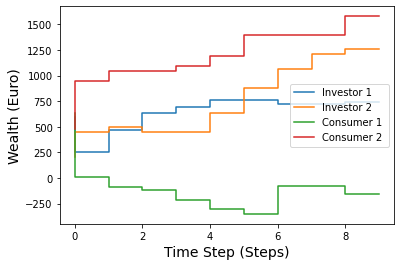

In [379]:
#Configurations for the graph
fig = plt.figure()
x_axis=[m for m in range (sim_Step)]
for i in range(Agents):
    plt.step(x_axis, df_[str(i)], label=agent_N[i])
plt.legend(loc=5, bbox_to_anchor=(1, .5))
plt.xlabel('Time Step (Steps)', fontsize=14)
plt.ylabel('Wealth (Euro)', fontsize=14)
plt.show()